In [1]:
import pandas as pd
import numpy as np

COLUMN_NAMES = ['frame', 'track_id', 'type', 'truncated', 'occluded',
                'alpha', 'bbox_left', 'bbox_top', 'bbox_right', 'bbox_bottom',
                'height', 'width', 'length', 'pos_x', 'pox_y', 'pos_z', 'rot_y']
df = pd.read_csv('/data/kitti/tracking/training/label_02/0000.txt', header=None, sep=' ', names=COLUMN_NAMES)
df.head()

,frame,track_id,type,truncated,occluded,alpha,bbox_left,bbox_top,bbox_right,bbox_bottom,height,width,length,pos_x,pox_y,pos_z,rot_y
0,0,-1,DontCare,-1,-1,-10.000000,219.310000,188.490000,245.500000,218.560000,-1000.000000,-1000.000000,-1000.000000,-10.000000,-1.000000,-1.000000,-1.000000
1,0,-1,DontCare,-1,-1,-10.000000,47.560000,195.280000,115.480000,221.480000,-1000.000000,-1000.000000,-1000.000000,-10.000000,-1.000000,-1.000000,-1.000000
2,0,0,Van,0,0,-1.793451,296.744956,161.752147,455.226042,292.372804,2.000000,1.823255,4.433886,-4.552284,1.858523,13.410495,-2.115488
3,0,1,Cyclist,0,0,-1.936993,737.619499,161.531951,931.112229,374.000000,1.739063,0.824591,1.785241,1.640400,1.675660,5.776261,-1.675458
4,0,2,Pedestrian,0,0,-2.523309,1106.137292,166.576807,1204.470628,323.876144,1.714062,0.767881,0.972283,6.301919,1.652419,8.455685,-1.900245


In [5]:
df['type'].unique()

array(['DontCare', 'Van', 'Cyclist', 'Pedestrian', 'Car'], dtype=object)

In [7]:
df = df[df.type.isin(['Car', 'Truck', 'Van', 'Tram', 'Pedestrian', 'Cyclist'])]
df

,frame,track_id,type,truncated,occluded,alpha,bbox_left,bbox_top,bbox_right,bbox_bottom,height,width,length,pos_x,pox_y,pos_z,rot_y
2,0,0,Van,0,0,-1.793451,296.744956,161.752147,455.226042,292.372804,2.000000,1.823255,4.433886,-4.552284,1.858523,13.410495,-2.115488
3,0,1,Cyclist,0,0,-1.936993,737.619499,161.531951,931.112229,374.000000,1.739063,0.824591,1.785241,1.640400,1.675660,5.776261,-1.675458
4,0,2,Pedestrian,0,0,-2.523309,1106.137292,166.576807,1204.470628,323.876144,1.714062,0.767881,0.972283,6.301919,1.652419,8.455685,-1.900245
7,1,0,Van,0,0,-1.796862,294.898777,156.024256,452.199718,284.621269,2.000000,1.823255,4.433886,-4.650955,1.766774,13.581085,-2.121565
8,1,1,Cyclist,0,0,-1.935205,745.017137,156.393157,938.839722,374.000000,1.739063,0.824591,1.785241,1.700640,1.640419,5.778596,-1.664456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,153,10,Car,0,2,-1.818856,680.294919,177.511028,842.313244,284.070033,1.524000,1.728591,3.894227,2.353367,1.622590,12.436503,-1.637280
1085,153,11,Car,0,2,1.864481,245.920800,194.456182,394.817829,286.444967,1.444000,1.595116,3.791789,-5.458963,1.908188,13.979427,1.497916
1086,153,12,Pedestrian,1,0,0.826456,1185.199080,151.165841,1241.000000,348.552707,1.688000,0.800000,0.884000,5.739732,1.500532,6.279632,1.543272
1087,153,13,Car,0,0,1.773993,344.361560,188.772369,430.531955,248.482384,1.422414,1.512803,3.707634,-6.033258,1.888008,19.788795,1.481180


In [8]:
box = np.array(df.loc[2, ['bbox_left', 'bbox_top', 'bbox_right', 'bbox_bottom']])
box

array([296.744956, 161.752147, 455.226042, 292.372804], dtype=object)

In [12]:
BOX_COLOR = {'Car': (255, 255, 0), 'Truck': (255, 255, 0), 'Van': (255, 255, 0), 'Tram': (255, 255, 0), 'Pedestrian': (0, 256, 255), 'Cyclist': (141, 40, 255)}

In [15]:
import cv2

frame = 140

image = cv2.imread('/data/kitti/RawData/2011_09_26/2011_09_26_drive_0005_sync/image_02/data/%010d.png'%frame)

boxes = np.array(df[df.frame==frame][['bbox_left', 'bbox_top', 'bbox_right', 'bbox_bottom']])
types = np.array(df[df.frame==frame]['type'])

for typ, box in zip(types, boxes):
    top_left = int(box[0]), int(box[1])
    bottom_right = int(box[2]), int(box[3])
    cv2.rectangle(image, top_left, bottom_right, BOX_COLOR[typ], 2)

cv2.imshow("image", image)
cv2.waitKey(0)


-1

In [1]:
import pandas as pd
import numpy as np

IMU_COLUMN_NAMES = ['lat', 'lon', 'alt', 'roll', 'pitch', 'yaw', 'vn', 've', 'vf', 'vl', 'vu', 'ax', 'ay', 'az', 'af', 'al', 'au', 'wx', 'wy', 'wz', 'wf', 'wl', 'wu', 'pos_accuracy', 'vel_accuracy', 'navstat', 'numsats', 'posmode', 'velmode', 'orimode']

def read_imu(path):
    df = pd.read_csv(path, header=None, sep=' ')
    df.columns = IMU_COLUMN_NAMES
    return df

def compute_great_circle_distance(lat1, lon1, lat2, lon2):
    R = 6371000  # radius of Earth in meters
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance


In [2]:
prev_imu_data = None
gps_distances = []
imu_distances = []
for frame in range(150):
    imu_data = read_imu('/data/kitti/RawData/2011_09_26/2011_09_26_drive_0005_sync/oxts/data/%010d.txt'%frame)
    
    if prev_imu_data is not None:
        gps_distances += [compute_great_circle_distance(imu_data.lat, imu_data.lon, prev_imu_data.lat, prev_imu_data.lon)]
        imu_distances += [0.1 * np.linalg.norm(imu_data[['vf', 'vl']])]
        
    prev_imu_data = imu_data

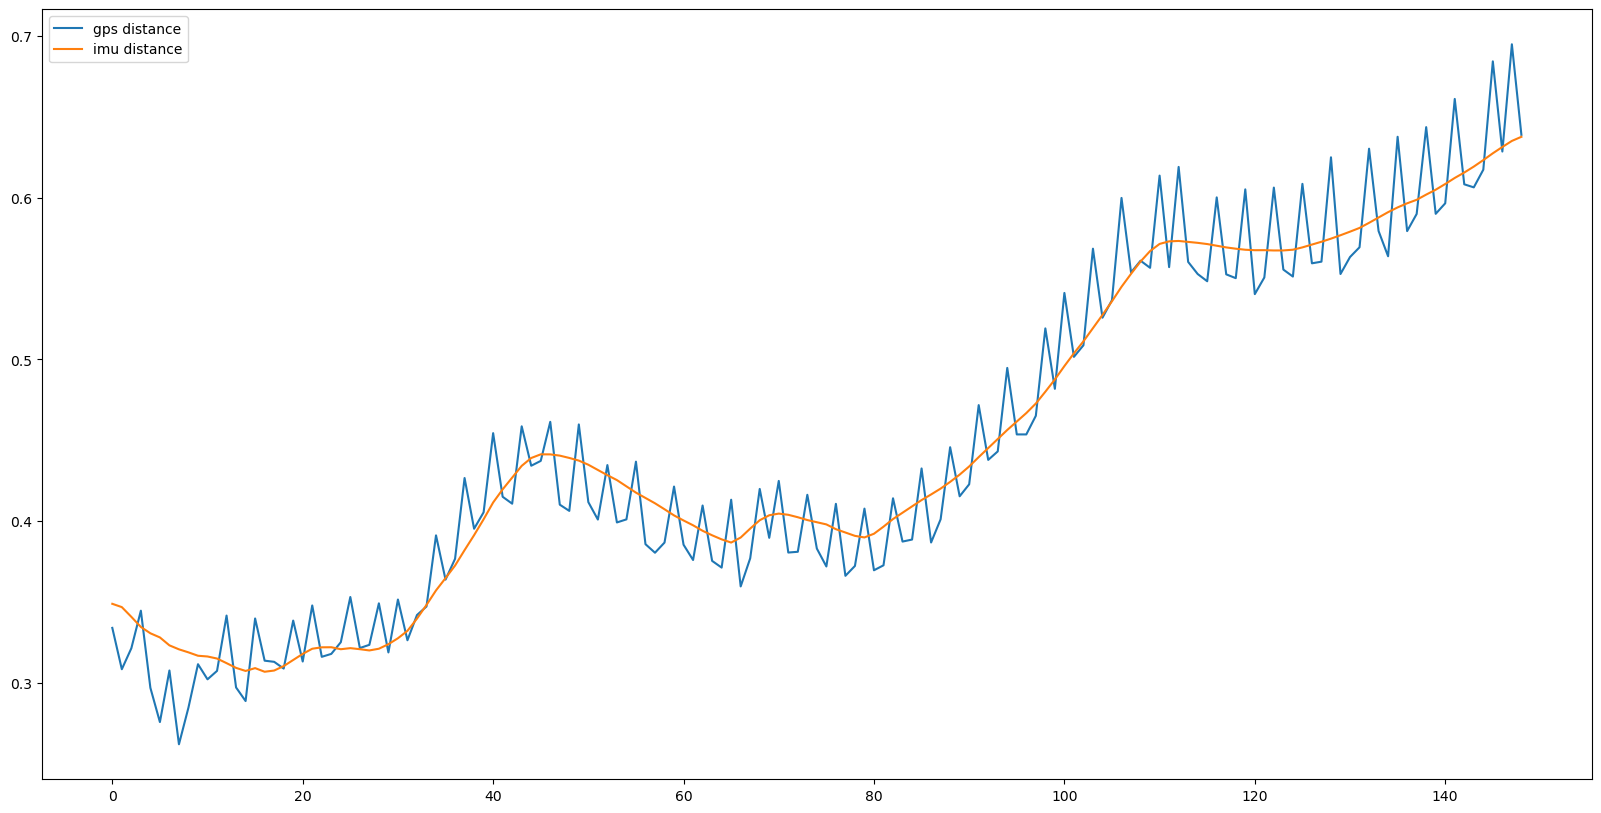

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(gps_distances, label = 'gps distance')
plt.plot(imu_distances, label = 'imu distance')
plt.legend()
plt.show()

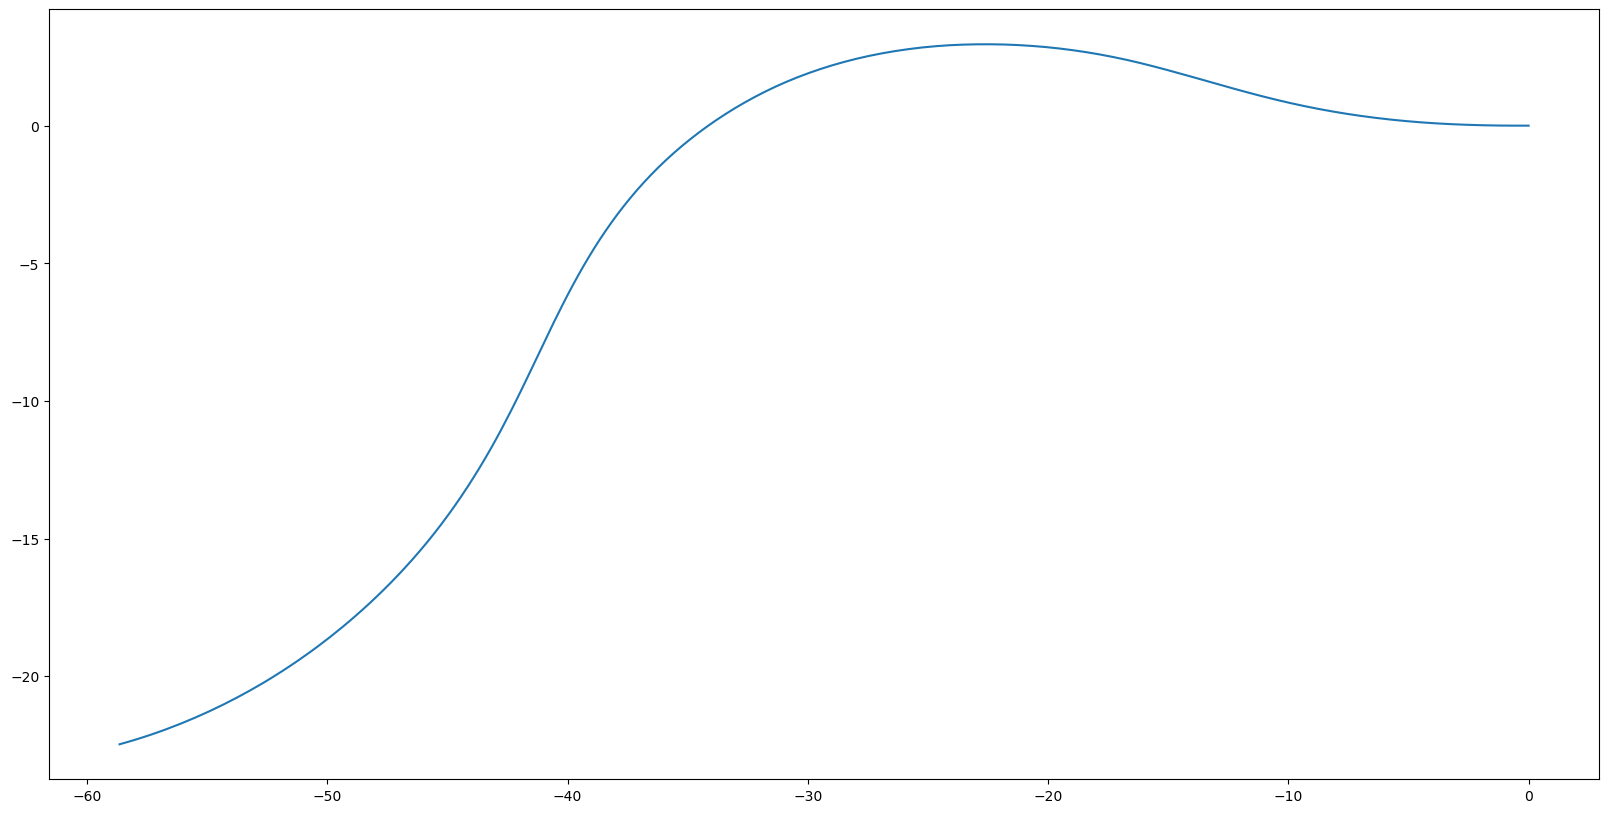

In [9]:
prev_imu_data = None
locations = []

for frame in range(154):
    imu_data = read_imu('/data/kitti/RawData/2011_09_26/2011_09_26_drive_0005_sync/oxts/data/%010d.txt'%frame)
    
    if prev_imu_data is not None:
        displacement = 0.1 * np.linalg.norm(imu_data[['vf', 'vl']])
        yaw_change = float((imu_data.yaw - prev_imu_data.yaw).iloc[0])
        for i in range(len(locations)):
            x0, y0 = locations[i]
            x1 = x0 * np.cos(yaw_change) + y0 * np.sin(yaw_change) - displacement
            y1 = -x0 * np.sin(yaw_change) + y0 * np.cos(yaw_change)
            locations[i] = np.array([x1, y1])
            
    locations += [np.array([0.0, 0.0])]
    prev_imu_data = imu_data
plt.figure(figsize=(20, 10))
plt.plot(np.array(locations)[:, 0], np.array(locations)[:, 1])


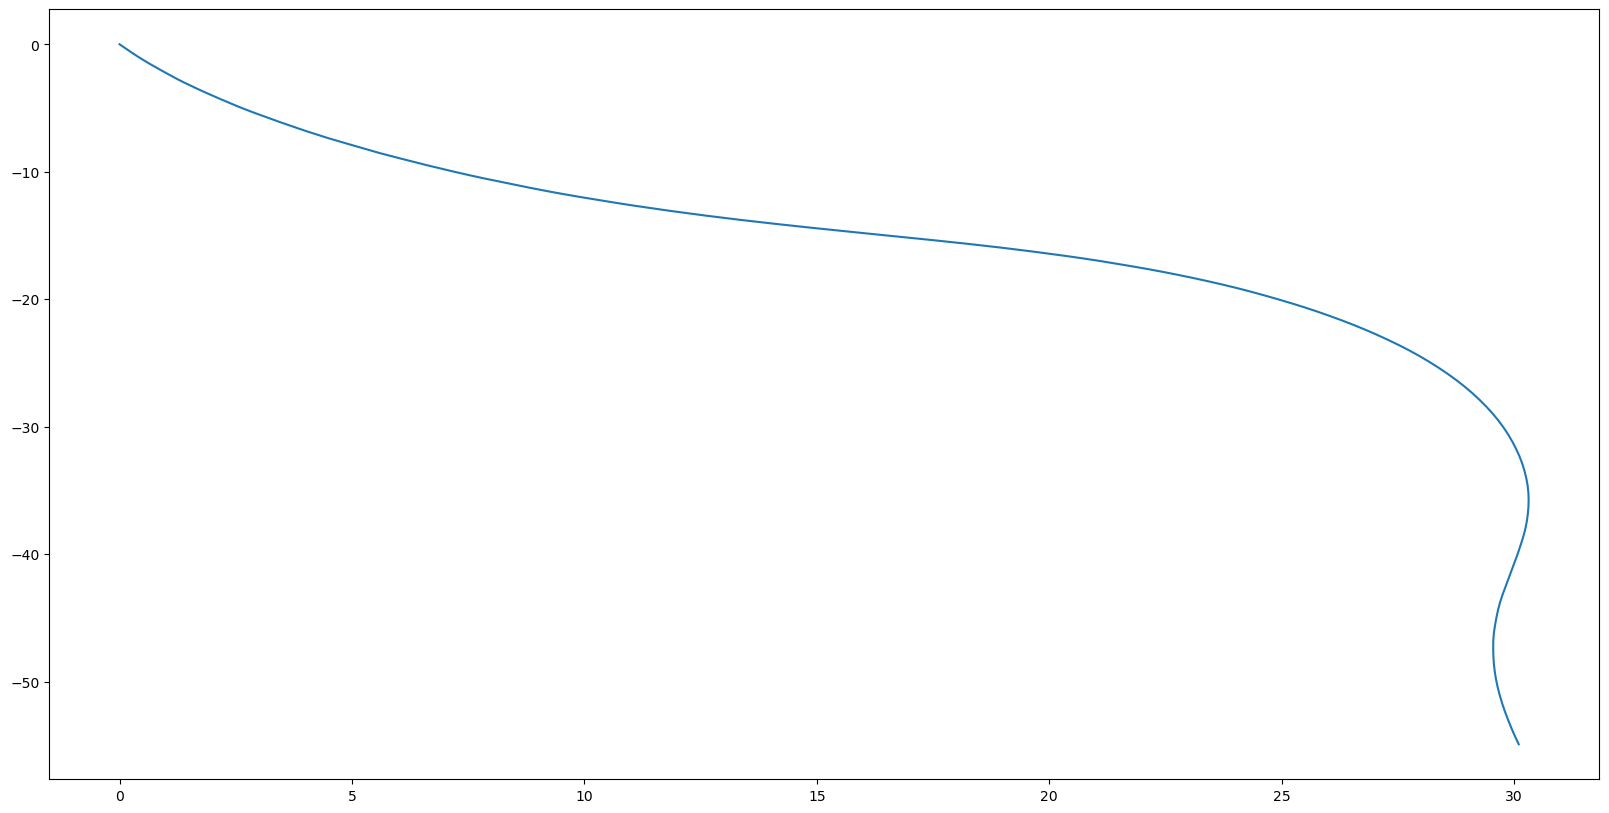

In [6]:
prev_imu_data = None
current_x, current_y = 0.0, 0.0
current_yaw = 0.0
locations = []

dt = 0.1  # time step in seconds

for frame in range(154):
    imu_data = read_imu('/data/kitti/RawData/2011_09_26/2011_09_26_drive_0005_sync/oxts/data/%010d.txt'%frame)
    
    if prev_imu_data is not None:
        # Get velocities in vehicle frame (extract scalar values)
        vf = imu_data['vf'].iloc[0] if hasattr(imu_data['vf'], 'iloc') else imu_data['vf']
        vl = imu_data['vl'].iloc[0] if hasattr(imu_data['vl'], 'iloc') else imu_data['vl']
        
        # Update yaw (cumulative)
        yaw = imu_data['yaw'].iloc[0] if hasattr(imu_data['yaw'], 'iloc') else imu_data['yaw']
        prev_yaw = prev_imu_data['yaw'].iloc[0] if hasattr(prev_imu_data['yaw'], 'iloc') else prev_imu_data['yaw']
        yaw_change = yaw - prev_yaw
        current_yaw += yaw_change
        
        # Transform velocities to global frame and integrate
        dx = dt * (vf * np.cos(current_yaw) - vl * np.sin(current_yaw))
        dy = dt * (vf * np.sin(current_yaw) + vl * np.cos(current_yaw))
        
        current_x += dx
        current_y += dy
    else:
        # Initialize yaw from first frame
        current_yaw = imu_data['yaw'].iloc[0] if hasattr(imu_data['yaw'], 'iloc') else imu_data['yaw']
    
    locations.append([float(current_x), float(current_y)])
    prev_imu_data = imu_data

locations = np.array(locations)
plt.figure(figsize=(20, 10))
plt.plot(np.array(locations)[:, 0], np.array(locations)[:, 1])